In [1369]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from kaggle.api.kaggle_api_extended import KaggleApi
from sqlalchemy.orm import declarative_base, sessionmaker
from sqlalchemy import Column, Integer, String, Date, Float, create_engine, inspect, text

In [1370]:
root_dir = os.getcwd()
db_dir = 'database'
db_name = 'dataset.db'
db_path = os.path.join(root_dir, db_dir, db_name)
db_url = f'sqlite:///{db_path}'

kaggle_data_set = 'eduardolicea/healthcare-dataset'

dataset_dir = 'dataset'
dataset_name = 'modified_healthcare_dataset.csv'
dataset_path = os.path.join(root_dir, dataset_dir, dataset_name)

separator = f"\n{'-'*100}\n"

In [1371]:
Base = declarative_base()

class Gender(Base):
    __tablename__ = 'genders'
    id = Column(Integer, primary_key=True, autoincrement=True)
    Gender = Column(String)

class BloodType(Base):
    __tablename__ = 'blood_types'
    id = Column(Integer, primary_key=True, autoincrement=True)
    BloodType = Column(String)

class MedicalCondition(Base):
    __tablename__ = 'medical_conditions'
    id = Column(Integer, primary_key=True, autoincrement=True)
    MedicalCondition = Column(String)

class Doctor(Base):
    __tablename__ = 'doctors'
    id = Column(Integer, primary_key=True, autoincrement=True)
    Doctor = Column(String, unique=True)

class Hospital(Base):
    __tablename__ = 'hospitals'
    id = Column(Integer, primary_key=True, autoincrement=True)
    Hospital = Column(String)

class InsuranceProvider(Base):
    __tablename__ = 'insurance_providers'
    id = Column(Integer, primary_key=True, autoincrement=True)
    InsuranceProvider = Column(String)

class AdmissionType(Base):
    __tablename__ = 'admission_types'
    id = Column(Integer, primary_key=True, autoincrement=True)
    AdmissionType = Column(String)

class Medication(Base):
    __tablename__ = 'medications'
    id = Column(Integer, primary_key=True, autoincrement=True)
    Medication = Column(String)

class TestResults(Base):
    __tablename__ = 'test_results'
    id = Column(Integer, primary_key=True, autoincrement=True)
    TestResults = Column(String)


class Patient(Base):
    __tablename__ = 'patients'
    id = Column(Integer, primary_key=True)
    Name = Column(String)
    Age = Column(Integer)
    DateOfAdmission = Column(Date)
    BillingAmount = Column(Float)
    RoomNumber = Column(Integer)
    DischargeDate = Column(Date)
    LengthOfStay = Column(Integer)

class DataSet(Base):
    __tablename__ = 'dataset'
    id = Column(Integer, primary_key=True, autoincrement=True)
    Name = Column(String)
    Age = Column(Integer)
    Gender = Column(String)
    BloodType = Column(String)
    MedicalCondition = Column(String)
    DateOfAdmission = Column(Date)
    Doctor = Column(String)
    Hospital = Column(String)
    InsuranceProvider = Column(String)
    BillingAmount = Column(Float)
    RoomNumber = Column(Integer)
    AdmissionType = Column(String)
    DischargeDate = Column(Date)
    Medication = Column(String)
    TestResults = Column(String)
    LengthOfStay = Column(Integer)
#
class LabelEncodingDF(Base):
    __tablename__ = 'view_label_encoding_df'
    id = Column(Integer, primary_key=True)
    Name = Column(String)
    Age = Column(Integer)
    GenderID = Column(Integer)
    BloodTypeID = Column(Integer)
    MedicalConditionID = Column(Integer)
    DateOfAdmission = Column(Date)
    DoctorID = Column(Integer)
    HospitalID = Column(Integer)
    InsuranceProviderID = Column(Integer)
    BillingAmount = Column(Float)
    RoomNumber = Column(Integer)
    AdmissionTypeID = Column(String)
    DischargeDate = Column(Date)
    MedicationID = Column(Integer)
    TestResultID = Column(Integer)
    LengthOfStay = Column(Integer)


In [1372]:

class Visualization:
    def __init__(self, data_frame):
        self.df = data_frame
        self.def_size = (8,5)

    def line_plot(self, **qargs) -> None:
        """
        Линейный график
        Входные переменные данных; должны быть числовыми.
        Можно передавать данные напрямую или ссылаться на столбцы в данных.

        :param x: Входная переменная данных.
        :param y: Входная переменная данных.
        :param title: Название
        :param xlabel: Подпись оси X.
        :param ylabel: Подпись оси Y.
        """
        plt.figure(figsize=qargs.get('figsize', self.def_size))
        sns.lineplot(x=qargs.get('x'), y=qargs.get('y'))
        plt.title(qargs.get('title',''))
        plt.xlabel(qargs.get('xlabel',''))
        plt.ylabel(qargs.get('ylabel',''))
        plt.show()

    def count_plot(self, **qargs):
        """
        Столбчатая диаграмма

        :param qargs:
        :return:
        """
        plt.figure(figsize=qargs.get('figsize',self.def_size))

        sns.countplot(data=self.df,
                      x=qargs.get('x'),
                      palette=qargs.get('palette', 'colorblind'),
                      hue=self.df[qargs.get('hue')] if 'hue' in qargs else None
        )
        plt.title(qargs.get('title',''))
        plt.xlabel(qargs.get('xlabel',''))
        plt.ylabel(qargs.get('ylabel',''))
        plt.legend (qargs.get('legend',[]))
        plt.show()


    def hist_plot(self, **qargs):
        """
        Гистограмма
        :param qargs:
        :return:
        """
        plt.figure(figsize=qargs.get('figsize', self.def_size))

        sns.histplot(data=self.df,
                     x=qargs.get('x'),
                     y=qargs.get('y'),
                     kde=qargs.get('kde', False),
                     bins=qargs.get('bins',  'auto'),
                     palette=qargs.get('palette'),
                     hue=self.df[qargs.get('hue')] if 'hue' in qargs else None
        )
        plt.title(qargs.get('title',''))
        plt.xlabel(qargs.get('xlabel',''))
        plt.ylabel(qargs.get('ylabel',''))
        plt.legend (qargs.get('legend',[]))
        plt.show()


    def bar_plot(self, **qargs):
        plt.figure(figsize=qargs.get('figsize', self.def_size))


    def heatmap_plot(self, **qargs):
        """
        Тепловая карта

        :param qargs:
        :return:
        """
        fig, ax = plt.subplots(figsize=qargs.get('figsize', self.def_size))
        sns.heatmap(
                    data=qargs.get('data', None),
                    annot=True,
                    mask=qargs.get('mask', None),
                    cmap=qargs.get('cmap', None),
                    vmin=qargs.get('vmin', None),
                    vmax=qargs.get('vmax', None),
                    ax=ax,

        )
        plt.title(qargs.get('title',''))
        plt.xlabel(qargs.get('xlabel',''))
        plt.ylabel(qargs.get('ylabel',''))

        plt.show()

    def pie_plot(self, **qargs):
        """
        Тепловая карта

        :param qargs:
        :return:
        """
        data = qargs.get('data', None)
        plt.figure(figsize=qargs.get('figsize', self.def_size))
        plt.pie(data,

                labels=qargs.get('labels', None),
                autopct=qargs.get('autopct'))

        plt.title(qargs.get('title',''))
        plt.legend(qargs.get('legend',''))

        plt.show()

    def scatter_plot(self, **qargs):
        """
        Диаграмма рассеивания

        :param qargs:
        :return:
        """
        plt.figure(figsize=qargs.get('figsize', self.def_size))

        sns.scatterplot(data=self.df,
                     x=qargs.get('x'),
                     y=qargs.get('y'),
                     palette=qargs.get('palette'),
                     hue=self.df[qargs.get('hue')] if 'hue' in qargs else None
                     )
        plt.title(qargs.get('title', ''))
        plt.xlabel(qargs.get('xlabel', ''))
        plt.ylabel(qargs.get('ylabel', ''))
        plt.legend(qargs.get('legend', []))
        plt.show()


In [1373]:
def load_data_csv(file_path):
    """
    Загрузка данных из CSV файла.
    :param file_path: Путь к CSV файлу.
    :return: DataFrame с загруженными данными.
    """
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        raise Exception(e)


In [1374]:
def load_kaggle_data_set(dataset):
    """
    Загрузка датасета из kaggle.

    Важно: Необходимо предварительно получить API Token.
    Переместите файл kaggle.json в папку ~/.kaggle/ (для Linux и macOS)
    или в C:/Users/<Ваше_имя_пользователя>/.kaggle/ (для Windows).
    Если папка .kaggle не существует, создайте ее.
    :param dataset:
    :return:
    """

    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset=dataset,
                               path='./dataset',
                               force=True,
                               unzip=True)              # Загрузка и распаковка

In [1375]:
engine = create_engine(db_url, echo=False)
Session = sessionmaker(bind=engine)

In [1376]:
def db_cerate():
    try:
        with Session()  as session:
            Base.metadata.create_all(engine)                # Создать базу данных (если она еще не существует)
            session.commit()
    except Exception as e:
        raise (f'Ошибка создания базы данных: {e}')

In [1377]:
def add_all_from_dataset_to_table(df: pd.DataFrame,
                                  table_name : str,
                                  unique_columns : list = None):
    """
    Преобразование столбца датафрейма в таблицу с избавлением от дубликатов и присвоением каждому значению уникального индекса.
    Думаю, что это своеобразный Label Encoding.

    :param df: датафрейм
    :param table_name: имя таблицы в БД
    :param unique_columns: Имя колонки для преобразования
    :return:
    """
    with Session() as session:
        truncate_table = text(f'DELETE FROM {table_name}')
        session.execute(truncate_table)
        session.commit()

    inspector = inspect(engine)

    # Получить список столбцов из таблицы 'patients', исключая id, т.к. он автоинкриментный в таблице
    columns = [col['name'] for col in inspector.get_columns(table_name) if col['name']  != 'id']

    # Если передан лист имен столбцов в которых значения д.б. уникальными
    if unique_columns:
        # Фильтр DataFrame, оставляя только те столбцы, которые есть в таблице, и дополнительный фильтр по уникальным
        df_filtered = df[columns].drop_duplicates(unique_columns)
    else:
        # Фильтр DataFrame, оставляя только те столбцы, которые есть в таблице
        df_filtered = df[columns]
    # Запись DataFrame в таблицу
    df_filtered.to_sql(table_name, con=engine, if_exists='append', index=False)

In [1378]:
def fill_db_tabes(df: pd.DataFrame):
    # Разнесу все признаки по таблицам и присвою им уникальные индексы (своеобразный Label Encoding)

    add_all_from_dataset_to_table(df, 'genders', ['Gender'])
    add_all_from_dataset_to_table(df, 'blood_types', ['BloodType'])
    add_all_from_dataset_to_table(df, 'medical_conditions', ['MedicalCondition'])
    add_all_from_dataset_to_table(df, 'doctors', ['Doctor'])
    add_all_from_dataset_to_table(df, 'hospitals', ['Hospital'])
    add_all_from_dataset_to_table(df, 'insurance_providers', ['InsuranceProvider'])
    add_all_from_dataset_to_table(df, 'admission_types', ['AdmissionType'])
    add_all_from_dataset_to_table(df, 'medications', ['Medication'])
    add_all_from_dataset_to_table(df, 'test_results', ['TestResults'])
    add_all_from_dataset_to_table(df, 'patients')
    add_all_from_dataset_to_table(df, 'dataset')

In [1379]:
# Создам представление
def create_view():
    drop_sql = """DROP VIEW IF EXISTS view_label_encoding_df"""
    create_sql = """
    CREATE VIEW view_label_encoding_df AS
    SELECT dataset.id,
            dataset.Name,
            dataset.Age,
            genders.id AS GenderID,
            blood_types.id AS BloodTypeID,
            medical_conditions.id AS MedicalConditionID,
            dataset.DateOfAdmission,
            doctors.id AS DoctorID,
            hospitals.id AS HospitalID,
            insurance_providers.id AS InsuranceProviderID,
            dataset.BillingAmount,
            dataset.RoomNumber,
            admission_types.id AS AdmissionTypeID,
            dataset.DischargeDate,
            medications.id AS MedicationID,
            test_results.id AS TestResultID,
            dataset.LengthOfStay
    FROM dataset
    JOIN genders ON genders.Gender = dataset.Gender
    JOIN blood_types ON blood_types.BloodType = dataset.BloodType
    JOIN medical_conditions ON medical_conditions.MedicalCondition = dataset.MedicalCondition
    JOIN doctors ON doctors.Doctor = dataset.Doctor
    JOIN hospitals ON hospitals.Hospital = dataset.Hospital
    JOIN insurance_providers ON insurance_providers.InsuranceProvider = dataset.InsuranceProvider
    JOIN admission_types ON admission_types.AdmissionType = dataset.AdmissionType
    JOIN medications ON medications.Medication = dataset.Medication
    JOIN test_results ON test_results.TestResults = dataset.TestResults;
    """

    with engine.connect() as connection:
        try:
            connection.execute(text(drop_sql))
            connection.execute(text(create_sql))
        except Exception as e:
            raise (f'Ошибка создания представления: {e}')


In [1380]:
def get_docs():
    # Лист врачей
    with Session() as session:
        docs = [doc.Doctor for doc in session.query(Doctor).all()]
    return docs

In [1381]:
def get_doctor_patients(docs : list):
    with Session() as session:
        doctor_patients = []
        for doc in docs:
            docs_pat_list = [p.Name for p in session.query(DataSet).filter(DataSet.Doctor == doc).all()]
            doctor_patients.append({'doc_name':doc,
                                    'patiens': docs_pat_list})

In [1382]:
def get_hospitals():
    # Лист клиник
    with Session() as session:
        return [h.Hospital for h in session.query(Hospital).all()]


In [1383]:
def get_hospital_patients(hospitals : list):
    with Session() as session:
        for hosp in hospitals:
            hospital_patients = [{'hospital': hosp,
                              'patient': h.Name} for h in session.query(DataSet).filter(DataSet.Hospital == hosp).all()]
    return hospital_patients

In [1384]:
def get_view_label_encoding_df():
    with Session() as session:
        results = session.query(LabelEncodingDF).all()
        label_encoding_df = pd.DataFrame([r.__dict__ for r in results])
        # Удаление лишние столбцы
        label_encoding_df = label_encoding_df.drop(columns=['_sa_instance_state',
                                                            'id',
                                                            'Name',
                                                            'RoomNumber',
                                                            'DateOfAdmission',
                                                            'DischargeDate'])
    return label_encoding_df

In [1385]:
def correlation_visualization(df):
    """
    Визуализация корреляции параметров

    :param df:
    :return:
    """
    corr = df.corr()
    mask = np.triu(np.ones_like(corr), k=0)

    Visualization(df).heatmap_plot(data = corr,
                                   title='Тепловая карта корреляции параметров',
                                   mask=mask,
                                   annot=True,
                                   cmap='viridis',
                                   vmin=-1,
                                   vmax=1,
                                   figsize = (20,15)
    )


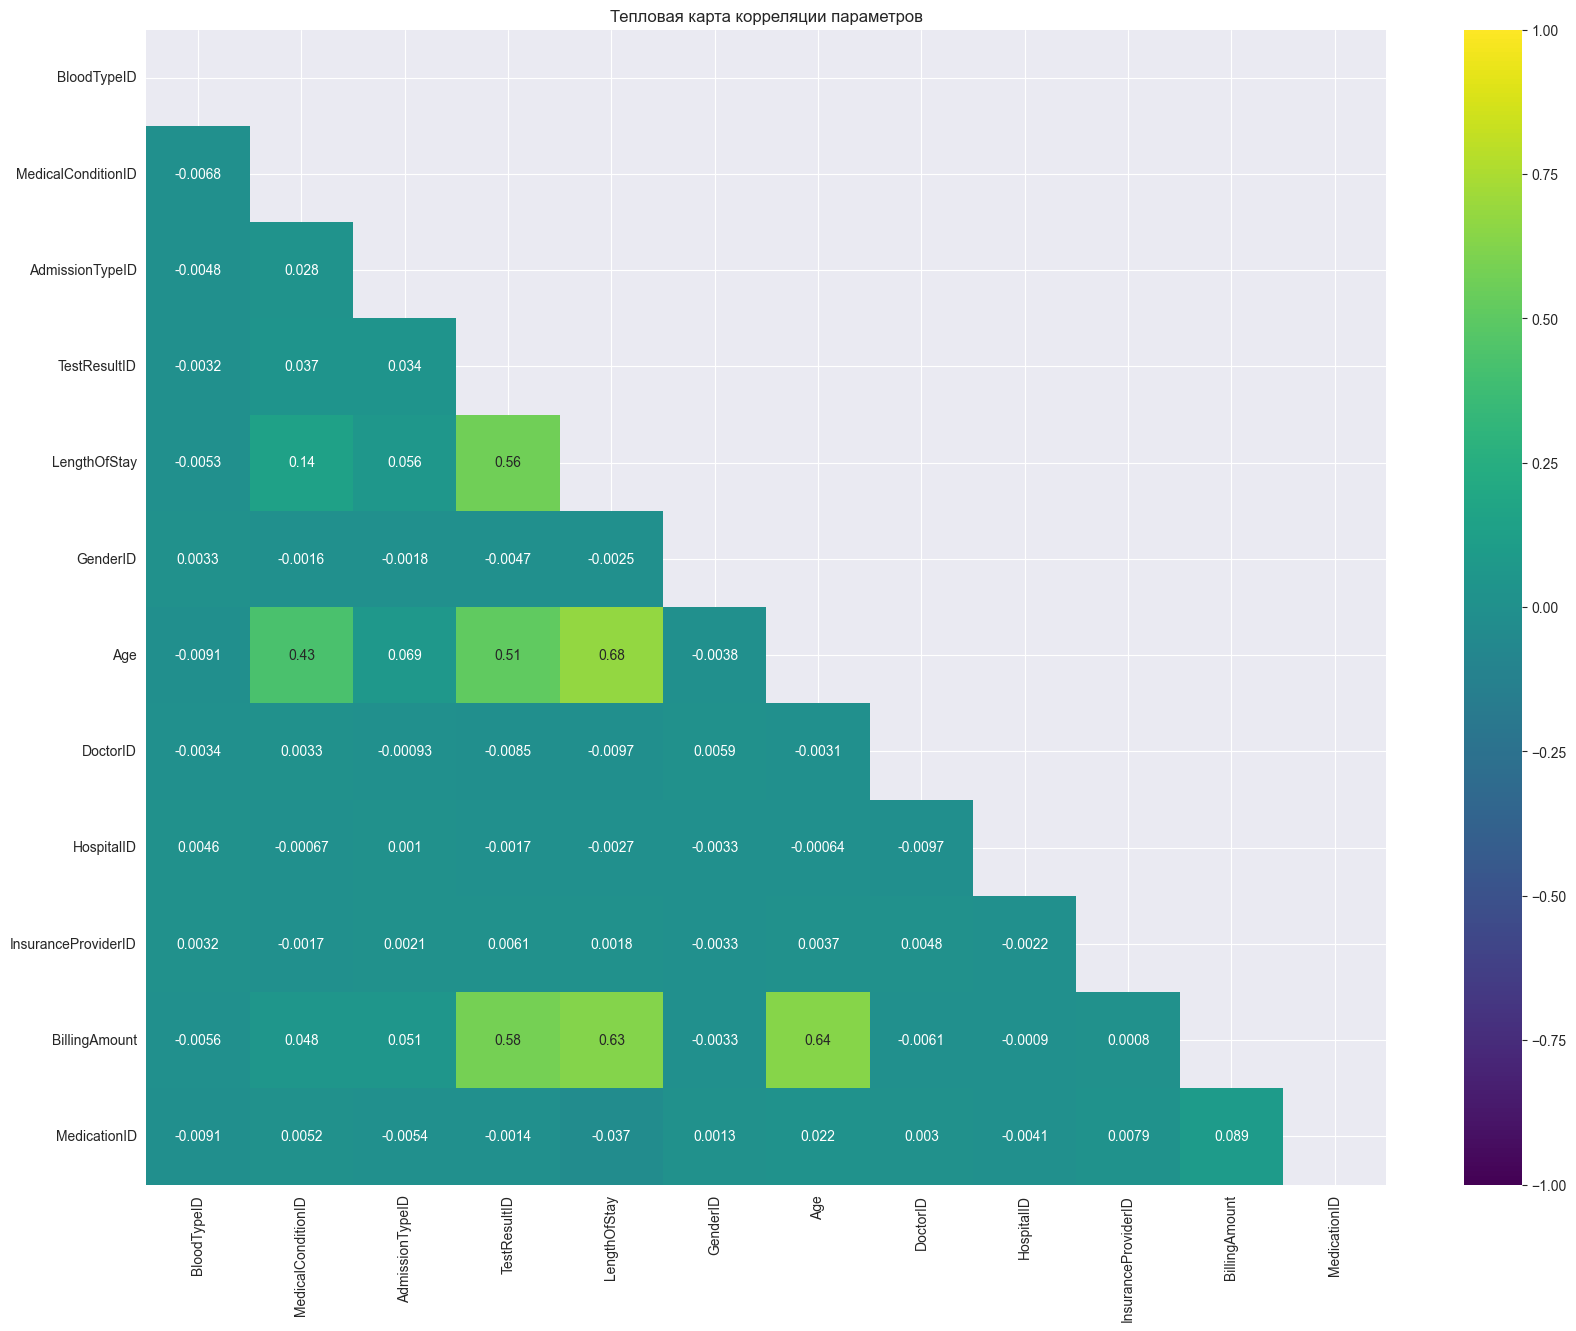

In [1386]:
    try:
        if not os.path.exists(dataset_path):
            # Загрузка файла датасета из kaggle если он не загружен
            load_kaggle_data_set(kaggle_data_set)
        # Загрузка файла в датафрейм
        df = load_data_csv(dataset_path)

        # Информация о датафрейме (датасете)
        # df.info()

        # Отсутствующие значения в столбцах датафрейма. Можно посмотреть и в информации, но так более наглядно.
        # print(separator,
        #       'Отсутствующие значения:\n',
        #       df.isna().sum())

        # print(separator,
        #       'Количество дублирующихся значений: ',
        #       df.duplicated().sum())

        # Переименовать столбцы для дальнейшей работы
        df.rename(columns={'Blood Type'         : 'BloodType',
                           'Medical Condition'  : 'MedicalCondition',
                           'Date of Admission'  : 'DateOfAdmission',
                           'Insurance Provider' : 'InsuranceProvider',
                           'Billing Amount'     : 'BillingAmount',
                           'Room Number'        : 'RoomNumber',
                           'Admission Type'     : 'AdmissionType',
                           'Discharge Date'     : 'DischargeDate',
                           'Test Results'       : 'TestResults',
                           'Length of Stay'     : 'LengthOfStay'
                           },
                  inplace=True
        )

        # df.info()           # Информация о датафрейме (датасете)
        db_cerate()         # Создать БД, со всеми таблицами (таблицы пустые)
        fill_db_tabes(df)   # Заполнить таблицы в БД соответствующими данными из датасета (датафрейма)
        create_view()       # Создать представление


        # print(df)
        abel_encoding_df = get_view_label_encoding_df()
        correlation_visualization(abel_encoding_df)




        # docs = get_docs()
        # get_doctor_patients(docs)
        # print(doctor_patients)

        hosps = get_hospitals()
        h_p = get_hospital_patients(hosps)
        h_p_df = pd.DataFrame.from_records(h_p)
        # print(h_p_df)

        # Вывести графи процентов по клиникам


    except Exception as e:
        print(f'При выполнении произошла ошибка: {e}')

